# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeBogota
machine = FakeBogota()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\isido\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import circs, Hammifier

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Noise Model

In [3]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [4]:
 noise_model = generateNoiseModel(machine, coherent = False, incoherent = False, readout= True)

Original: 0.024 0.10799999999999998
Reverse: 0.024 0.10799999999999998
Original: 0.004 0.039000000000000035
Reverse: 0.004 0.039000000000000035
Original: 0.009000000000000008 0.026
Reverse: 0.009000000000000008 0.026
Original: 0.005 0.03400000000000003
Reverse: 0.005 0.03400000000000003
Original: 0.019 0.135
Reverse: 0.019 0.135


# Variational Form
For Hydrogen

In [5]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [6]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 10000
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_inr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    noisy_inr = evaluator(circs_inr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True, invert = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, noisy_inr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    diff_inr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(d, u)
        p2 = random.uniform(d, u)
        p3 = random.uniform(d, u)


        noisy_r,noisy_nr, noisy_inr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr, noisy_inr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        diff_inr.append(noisy_inr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        print('Inverted Mitigated diff is ' + str(noisy_inr-ideal))
        
    return energies, diff_r, diff_nr, diff_inr
energies, diff_r, diff_nr, diff_inr = main()

0
Noisy diff is 0.055864990234375037
Mitigated diff is 0.02530200594761145
Inverted Mitigated diff is -0.013752577473878841
1
Noisy diff is 0.04351000976562497
Mitigated diff is 0.010918108199309384
Inverted Mitigated diff is -0.021017101083341594
2
Noisy diff is 0.049931884765625045
Mitigated diff is 0.00713934259100274
Inverted Mitigated diff is -0.0101986305469704
3
Noisy diff is 0.10054223632812498
Mitigated diff is 0.03131933224110961
Inverted Mitigated diff is -0.006789336867559559
4
Noisy diff is 0.029438476562500093
Mitigated diff is 0.00805847087482836
Inverted Mitigated diff is -0.02516863535227798
5
Noisy diff is -0.005801269531249986
Mitigated diff is -0.0025234569954784847
Inverted Mitigated diff is -0.0001571566291781179
6
Noisy diff is -0.005099365234374986
Mitigated diff is 0.014925192927732034
Inverted Mitigated diff is -0.0008054542029151124
7
Noisy diff is -0.012715820312499987
Mitigated diff is 0.0257839080624237
Inverted Mitigated diff is -0.018446128567612907
8
No

Noisy diff is 0.06809960937500004
Mitigated diff is -0.005919449096634777
Inverted Mitigated diff is -0.0065236742767545985
67
Noisy diff is -0.00044482421875000067
Mitigated diff is 0.02997880179716117
Inverted Mitigated diff is -0.021878829460470095
68
Noisy diff is 0.012993164062500014
Mitigated diff is 0.01406365166409112
Inverted Mitigated diff is -0.005196909996470543
69
Noisy diff is 0.07968457031249998
Mitigated diff is 0.006744199171054621
Inverted Mitigated diff is 0.008468741295596716
70
Noisy diff is 0.07506494140625003
Mitigated diff is -0.00011937480921853094
Inverted Mitigated diff is -0.008030974320818063
71
Noisy diff is 0.025862792968749992
Mitigated diff is 0.019110397117131195
Inverted Mitigated diff is 0.004037528855692918
72
Noisy diff is 0.1043554687499999
Mitigated diff is 0.026982633880876072
Inverted Mitigated diff is -0.01239856270032047
73
Noisy diff is 0.07022729492187496
Mitigated diff is 0.013839839606971438
Inverted Mitigated diff is -0.01030279903991815

Noisy diff is 0.11250610351562518
Mitigated diff is 0.011085126559638114
Inverted Mitigated diff is -0.011386424111912152
133
Noisy diff is 0.016179931640625006
Mitigated diff is 0.005843202993837754
Inverted Mitigated diff is -0.003432010681375941
134
Noisy diff is -0.017870605468749995
Mitigated diff is 0.009654710274534503
Inverted Mitigated diff is 0.010388532008356224
135
Noisy diff is 0.023057128906250002
Mitigated diff is 0.03214809421264497
Inverted Mitigated diff is -0.014558390841086288
136
Noisy diff is -0.023967529296874998
Mitigated diff is -0.004718395623473745
Inverted Mitigated diff is 0.002281848576770454
137
Noisy diff is 0.060732910156250014
Mitigated diff is 0.0028882662956786764
Inverted Mitigated diff is -0.011266991233592816
138
Noisy diff is 0.04057934570312499
Mitigated diff is 0.025626373149419956
Inverted Mitigated diff is -0.02764322392017715
139
Noisy diff is 0.076887939453125
Mitigated diff is 0.010610204940984025
Inverted Mitigated diff is -0.018532521916

Noisy diff is 0.05703393554687497
Mitigated diff is 0.022796818921295037
Inverted Mitigated diff is 0.006973882795806685
198
Noisy diff is 0.0028259277343749972
Mitigated diff is 0.009056347888793288
Inverted Mitigated diff is -0.015647339612427494
199
Noisy diff is 0.052194335937500114
Mitigated diff is 0.018738925018124353
Inverted Mitigated diff is -0.008051306972107652
200
Noisy diff is 0.046405517578125055
Mitigated diff is 0.005639609983115856
Inverted Mitigated diff is -0.005882245938739983
201
Noisy diff is 0.07876147460937488
Mitigated diff is 0.006119727319756296
Inverted Mitigated diff is -0.004768787381238648
202
Noisy diff is -0.03306298828125004
Mitigated diff is -0.005740908847012366
Inverted Mitigated diff is -0.01100244730855085
203
Noisy diff is 0.07266259765625005
Mitigated diff is 0.021867040419433048
Inverted Mitigated diff is -0.016934668982276357
204
Noisy diff is 0.04408105468750001
Mitigated diff is 0.035479382011217975
Inverted Mitigated diff is -0.02021950075

Noisy diff is -0.006964111328124967
Mitigated diff is 0.0033046320541437746
Inverted Mitigated diff is -0.005799885650373926
263
Noisy diff is 0.06253393554687492
Mitigated diff is 0.0014482315752823993
Inverted Mitigated diff is -0.005476428757803853
264
Noisy diff is -0.007688232421875024
Mitigated diff is 0.004874009844322333
Inverted Mitigated diff is -0.014057490421602162
265
Noisy diff is -0.022974853515624977
Mitigated diff is 0.0176355158133967
Inverted Mitigated diff is -0.0030066782552719273
266
Noisy diff is 0.04284594726562502
Mitigated diff is 0.009301139664775193
Inverted Mitigated diff is -0.01746389640090812
267
Noisy diff is 0.071788818359375
Mitigated diff is -0.006919736399668142
Inverted Mitigated diff is -0.006996659476591227
268
Noisy diff is -0.004066162109374993
Mitigated diff is 0.024403159837207013
Inverted Mitigated diff is -0.03275914963942307
269
Noisy diff is 0.08476171875000005
Mitigated diff is 0.019015380263183168
Inverted Mitigated diff is -0.012584131

Noisy diff is -0.0009208984375000395
Mitigated diff is 0.015093426625457845
Inverted Mitigated diff is -0.017639174107142885
329
Noisy diff is 0.04035327148437501
Mitigated diff is 0.0352972486335279
Inverted Mitigated diff is -0.008620944284664922
330
Noisy diff is 0.09280004882812498
Mitigated diff is 0.015366005787831982
Inverted Mitigated diff is 0.019446836068662154
331
Noisy diff is -0.025686035156249995
Mitigated diff is -0.005644196607429026
Inverted Mitigated diff is -0.019415625178857608
332
Noisy diff is 0.08048583984375002
Mitigated diff is 0.03180214308900464
Inverted Mitigated diff is -0.012724399694272748
333
Noisy diff is 0.09017236328125
Mitigated diff is 0.015283427678326134
Inverted Mitigated diff is 0.006021735163977526
334
Noisy diff is 0.07743115234375009
Mitigated diff is -0.0023276588970924106
Inverted Mitigated diff is 0.0071410075038733645
335
Noisy diff is 0.03921411132812502
Mitigated diff is 0.03870507442860949
Inverted Mitigated diff is -0.0047584760831030

Noisy diff is 0.05246630859374998
Mitigated diff is 0.024868603575244175
Inverted Mitigated diff is -0.0137111278044873
394
Noisy diff is 0.05762109375000002
Mitigated diff is 0.021397153660141943
Inverted Mitigated diff is -0.0077215276585393955
395
Noisy diff is 0.07850732421875001
Mitigated diff is 0.012520158920940105
Inverted Mitigated diff is -0.00895627575549457
396
Noisy diff is 0.07186669921874989
Mitigated diff is 0.002862108367312599
Inverted Mitigated diff is -0.01749055984614456
397
Noisy diff is 0.08606518554687481
Mitigated diff is 0.015921036515567533
Inverted Mitigated diff is -0.006315593521062257
398
Noisy diff is 0.05400659179687506
Mitigated diff is 0.00017918836805563831
Inverted Mitigated diff is -0.0027661107772435356
399
Noisy diff is 0.08961523437500007
Mitigated diff is -0.0022959630647130247
Inverted Mitigated diff is 0.0025282810782757403
400
Noisy diff is 0.008331054687499999
Mitigated diff is 0.031326234594398664
Inverted Mitigated diff is -0.003988539520

Noisy diff is -0.012175781250000073
Mitigated diff is 0.015690603298611105
Inverted Mitigated diff is -0.011532169798090519
459
Noisy diff is 0.064612548828125
Mitigated diff is 0.006386988169165886
Inverted Mitigated diff is -0.008116064333886619
460
Noisy diff is 0.07671508789062498
Mitigated diff is 0.017429719455891335
Inverted Mitigated diff is -0.01788910690980272
461
Noisy diff is 0.01929077148437497
Mitigated diff is 0.007501583187862426
Inverted Mitigated diff is -0.018062763576484286
462
Noisy diff is -0.022961914062500005
Mitigated diff is 0.006723717292906738
Inverted Mitigated diff is 0.001201473555178821
463
Noisy diff is -0.026781250000000006
Mitigated diff is -0.008998606857092986
Inverted Mitigated diff is -0.020799070894215954
464
Noisy diff is 0.04504785156250013
Mitigated diff is 0.023945489352141802
Inverted Mitigated diff is -0.01644879020718859
465
Noisy diff is 0.04253051757812498
Mitigated diff is 0.005645148861086524
Inverted Mitigated diff is -0.0099369734981

Noisy diff is 0.018930419921874997
Mitigated diff is 0.019685613708123495
Inverted Mitigated diff is -0.023902703088985566
524
Noisy diff is -0.019970947265624983
Mitigated diff is -0.0009769569291694369
Inverted Mitigated diff is -0.011887692331539995
525
Noisy diff is 0.08005322265625003
Mitigated diff is 0.01041285938453912
Inverted Mitigated diff is -0.016577372605692975
526
Noisy diff is 0.07899267578124997
Mitigated diff is 0.007644550864716881
Inverted Mitigated diff is -0.004379984445836316
527
Noisy diff is 0.012898437500000082
Mitigated diff is 0.012248753481761354
Inverted Mitigated diff is -0.015171579371908939
528
Noisy diff is 0.0484003906249999
Mitigated diff is 0.0010602379283043417
Inverted Mitigated diff is -0.01107924985355746
529
Noisy diff is -0.031335205078124984
Mitigated diff is 0.022588865368892375
Inverted Mitigated diff is -0.0232665504327928
530
Noisy diff is -0.023519531249999996
Mitigated diff is 0.00014112794757326422
Inverted Mitigated diff is 0.00013526

Noisy diff is 0.07328930664062505
Mitigated diff is 0.006261904702285492
Inverted Mitigated diff is 0.0036506714910523597
589
Noisy diff is 0.01843994140625002
Mitigated diff is 0.003822966090983676
Inverted Mitigated diff is -0.026089371299580638
590
Noisy diff is 0.08766040039062495
Mitigated diff is 0.029931589650583734
Inverted Mitigated diff is -0.002214442095448077
591
Noisy diff is 0.03676074218749997
Mitigated diff is 0.0058998052240727406
Inverted Mitigated diff is -0.03594756962330209
592
Noisy diff is 0.04213720703125001
Mitigated diff is 0.01688160336299982
Inverted Mitigated diff is -0.012202645721249294
593
Noisy diff is -0.00801538085937499
Mitigated diff is -0.008804999346493786
Inverted Mitigated diff is -0.02099472036210319
594
Noisy diff is 0.06905883789062506
Mitigated diff is 0.019591056344913815
Inverted Mitigated diff is -0.02492866928840326
595
Noisy diff is -0.03381445312500003
Mitigated diff is 0.0026976788663241047
Inverted Mitigated diff is -0.03667611524773

Noisy diff is 0.07154052734375005
Mitigated diff is 0.01222670844780216
Inverted Mitigated diff is -0.01136169089250827
654
Noisy diff is 0.08969848632812505
Mitigated diff is 0.007554983091994871
Inverted Mitigated diff is 0.0019261674631791958
655
Noisy diff is 0.05385986328125003
Mitigated diff is 0.016343949426224802
Inverted Mitigated diff is -0.025297076214800818
656
Noisy diff is 0.08382421875000001
Mitigated diff is 0.0001704775855654317
Inverted Mitigated diff is -0.001208032792945013
657
Noisy diff is 0.02544824218749997
Mitigated diff is 0.01617494085775334
Inverted Mitigated diff is -0.008519076236263745
658
Noisy diff is 0.08208593750000004
Mitigated diff is 0.006999909080719624
Inverted Mitigated diff is -0.00040409292262300056
659
Noisy diff is 0.029146240234375065
Mitigated diff is 0.011911587434601745
Inverted Mitigated diff is 0.0015588107042697752
660
Noisy diff is -0.008618408203125011
Mitigated diff is 0.003586049226381255
Inverted Mitigated diff is -0.018722845921

Noisy diff is 0.027410400390625013
Mitigated diff is 0.024730100303342495
Inverted Mitigated diff is -0.011109460136217941
719
Noisy diff is 0.02270068359375005
Mitigated diff is 0.011246105256505712
Inverted Mitigated diff is 0.014568937979338392
720
Noisy diff is 0.05973022460937505
Mitigated diff is 0.025935950318128065
Inverted Mitigated diff is -0.02403450145232372
721
Noisy diff is 0.09397265625000006
Mitigated diff is 0.0057556199442917455
Inverted Mitigated diff is -0.0025679453792735174
722
Noisy diff is -0.0069101562499999936
Mitigated diff is 0.012155733518868297
Inverted Mitigated diff is 0.0068070155701503154
723
Noisy diff is -0.02736816406249999
Mitigated diff is -0.009052364318624093
Inverted Mitigated diff is -0.006406679161594445
724
Noisy diff is 0.06822192382812498
Mitigated diff is 0.014988930920425136
Inverted Mitigated diff is -0.006781276649782508
725
Noisy diff is 0.06858056640625004
Mitigated diff is 0.011377560108077667
Inverted Mitigated diff is -0.012137214

Noisy diff is 0.03901733398437496
Mitigated diff is 0.0013251028431204293
Inverted Mitigated diff is -0.022921295203277625
785
Noisy diff is 0.011417724609375013
Mitigated diff is 0.013732220362103142
Inverted Mitigated diff is -0.010668023838141028
786
Noisy diff is 0.032235107421875006
Mitigated diff is 0.0192428201193338
Inverted Mitigated diff is -0.012612369135855464
787
Noisy diff is 0.028293701171874963
Mitigated diff is 0.02910869307558761
Inverted Mitigated diff is -0.03949887713198258
788
Noisy diff is 0.029867187500000017
Mitigated diff is 0.004675566799736741
Inverted Mitigated diff is -0.008629927705757795
789
Noisy diff is 0.008719726562499995
Mitigated diff is 0.025705881263881063
Inverted Mitigated diff is -0.01966058594823277
790
Noisy diff is 0.038639892578125
Mitigated diff is 0.0009219496821670226
Inverted Mitigated diff is -0.017859760199652797
791
Noisy diff is 0.047436523437500044
Mitigated diff is 0.021609872789351503
Inverted Mitigated diff is -0.01527436678447

Noisy diff is 0.079408935546875
Mitigated diff is 0.011303053576198097
Inverted Mitigated diff is -0.004019534946390291
851
Noisy diff is 0.05270336914062507
Mitigated diff is 0.011863413246909482
Inverted Mitigated diff is 0.004639398185160792
852
Noisy diff is 0.00242749023437501
Mitigated diff is 0.005409428239945821
Inverted Mitigated diff is -0.006798874568357011
853
Noisy diff is 0.0076828613281250124
Mitigated diff is -0.007455070462997232
Inverted Mitigated diff is -0.002520437282986121
854
Noisy diff is 0.06109936523437498
Mitigated diff is 0.018951222014747415
Inverted Mitigated diff is -0.021660182873223577
855
Noisy diff is -0.000935302734375032
Mitigated diff is 0.01000698122949098
Inverted Mitigated diff is -0.00160034477783505
856
Noisy diff is 0.0815566406249999
Mitigated diff is 0.017704940881601017
Inverted Mitigated diff is -0.027863557286897156
857
Noisy diff is 0.08003173828124999
Mitigated diff is 0.008950798076592825
Inverted Mitigated diff is -0.0074184708629045

Noisy diff is 0.09038574218750006
Mitigated diff is 0.012516381090697526
Inverted Mitigated diff is -0.016717806943490454
916
Noisy diff is 0.031916259765624955
Mitigated diff is 0.02949015831018803
Inverted Mitigated diff is -0.021131407394688606
917
Noisy diff is 0.05256860351562498
Mitigated diff is 0.009814226214323818
Inverted Mitigated diff is -0.011323502723405099
918
Noisy diff is 0.05891259765625001
Mitigated diff is 0.019033740115136588
Inverted Mitigated diff is 0.013013471494867979
919
Noisy diff is 0.07057177734374998
Mitigated diff is 0.026220086960565436
Inverted Mitigated diff is -0.020361842221363724
920
Noisy diff is 0.005999511718749989
Mitigated diff is 0.03077317756028694
Inverted Mitigated diff is -0.018403867616758246
921
Noisy diff is 0.05500927734375005
Mitigated diff is 0.018885402286747066
Inverted Mitigated diff is -0.008131083242621573
922
Noisy diff is 0.09009399414062502
Mitigated diff is 0.009816314425219796
Inverted Mitigated diff is 0.01605639257884039

Noisy diff is 0.05413427734374987
Mitigated diff is 0.004387663595085467
Inverted Mitigated diff is -0.01257242065384978
981
Noisy diff is -0.018355712890625014
Mitigated diff is -0.003938420043498175
Inverted Mitigated diff is -0.00932767523275338
982
Noisy diff is 0.00619067382812501
Mitigated diff is -0.0019428323067243389
Inverted Mitigated diff is -0.016896794939524437
983
Noisy diff is 0.06779589843749995
Mitigated diff is 0.014264304750465528
Inverted Mitigated diff is -0.01594201126564415
984
Noisy diff is 0.04760839843749998
Mitigated diff is 0.03872657660166265
Inverted Mitigated diff is -0.02480057502718641
985
Noisy diff is -0.007423095703124993
Mitigated diff is 0.012891992742026279
Inverted Mitigated diff is 0.002330038955185465
986
Noisy diff is 0.038466796875000014
Mitigated diff is 0.03383275812728939
Inverted Mitigated diff is -0.014829512934981665
987
Noisy diff is 0.07202514648437508
Mitigated diff is 0.010348575720144804
Inverted Mitigated diff is -0.02621022266793

In [7]:
energies

[[[-3.045858178699093, 1.2541062497678679, 1.541571068510195],
  -0.1671813054501688,
  -0.11131631521579376,
  -0.14187929950255734,
  -0.18093388292404763],
 [[-0.46436093086086627, -2.9241311479545513, -0.698121598605077],
  -0.45024258474704376,
  -0.4067325749814188,
  -0.4393244765477344,
  -0.47125968583038536],
 [[3.0101540636714494, -1.3047611234892844, -2.396368741198383],
  -0.2022877507626688,
  -0.15235586599704376,
  -0.19514840817166607,
  -0.2124863813096392],
 [[-0.4623121458890096, -2.8787742505425187, 0.22067679219762448],
  -1.0552301335751686,
  -0.9546878972470436,
  -1.023910801334059,
  -1.0620194704427282],
 [[-1.9826223273775396, 2.469202430409946, -1.4508581378793808],
  -0.5434574284970439,
  -0.5140189519345438,
  -0.5353989576222156,
  -0.5686260638493219],
 [[-1.3338561817923724, -2.6587488782359805, 2.844028932732826],
  -0.11845205740329379,
  -0.12425332693454377,
  -0.12097551439877227,
  -0.1186092140324719],
 [[0.34437042652023697, -0.30503880676604

In [8]:
diff_r

[0.055864990234375037,
 0.04351000976562497,
 0.049931884765625045,
 0.10054223632812498,
 0.029438476562500093,
 -0.005801269531249986,
 -0.005099365234374986,
 -0.012715820312499987,
 -0.014535644531250003,
 0.051203613281250004,
 0.05305322265625001,
 0.034090576171875026,
 0.0069741210937500075,
 0.08105322265624992,
 -0.0045783691406250104,
 0.06476489257812501,
 0.013516845703125002,
 -0.00433691406250003,
 0.0470200195312499,
 0.02139331054687501,
 0.06740454101562499,
 0.07031933593749995,
 -0.031941650390624965,
 0.025964599609375028,
 0.08425781249999997,
 0.013448974609375011,
 0.08243505859374989,
 -0.0022900390625000006,
 -0.022830566406249975,
 0.054790771484375056,
 0.09555688476562485,
 0.058608886718749975,
 0.05583691406249991,
 0.08913525390624999,
 0.08624365234374987,
 0.09623266601562497,
 -0.016216796874999995,
 -0.0028906250000000078,
 0.023436523437499968,
 0.046392089843749984,
 0.08011254882812502,
 0.00875341796875001,
 0.10082543945312494,
 0.07785131835937

In [9]:
diff_nr

[0.02530200594761145,
 0.010918108199309384,
 0.00713934259100274,
 0.03131933224110961,
 0.00805847087482836,
 -0.0025234569954784847,
 0.014925192927732034,
 0.0257839080624237,
 0.000862701143969774,
 0.033329069364200464,
 0.018957970967834248,
 0.016748868964152147,
 0.003601233103918647,
 -0.0046351436568872195,
 0.0111106374714747,
 0.02350151462578215,
 0.011801399858821726,
 0.018875592508338146,
 0.015464748735202982,
 0.0257777041920755,
 0.026349780184008686,
 0.02818718795310593,
 -0.0027991661062461426,
 0.02967642704517709,
 -0.0016836344699137085,
 0.010053024070256218,
 0.01636696547809835,
 -0.0008738234747023843,
 0.023901573946886412,
 0.0147696111196709,
 0.028986922945760885,
 0.008923920516231698,
 -0.007947397280269275,
 0.025843111120650186,
 0.021379606835221998,
 0.011401638547613335,
 0.0118075960226839,
 0.01312494055965735,
 0.028431931214653428,
 0.01920312613276476,
 -0.007161634090735558,
 0.005861761758580553,
 0.038175475820837135,
 0.0049200566010330

In [10]:
diff_nr

[0.02530200594761145,
 0.010918108199309384,
 0.00713934259100274,
 0.03131933224110961,
 0.00805847087482836,
 -0.0025234569954784847,
 0.014925192927732034,
 0.0257839080624237,
 0.000862701143969774,
 0.033329069364200464,
 0.018957970967834248,
 0.016748868964152147,
 0.003601233103918647,
 -0.0046351436568872195,
 0.0111106374714747,
 0.02350151462578215,
 0.011801399858821726,
 0.018875592508338146,
 0.015464748735202982,
 0.0257777041920755,
 0.026349780184008686,
 0.02818718795310593,
 -0.0027991661062461426,
 0.02967642704517709,
 -0.0016836344699137085,
 0.010053024070256218,
 0.01636696547809835,
 -0.0008738234747023843,
 0.023901573946886412,
 0.0147696111196709,
 0.028986922945760885,
 0.008923920516231698,
 -0.007947397280269275,
 0.025843111120650186,
 0.021379606835221998,
 0.011401638547613335,
 0.0118075960226839,
 0.01312494055965735,
 0.028431931214653428,
 0.01920312613276476,
 -0.007161634090735558,
 0.005861761758580553,
 0.038175475820837135,
 0.0049200566010330

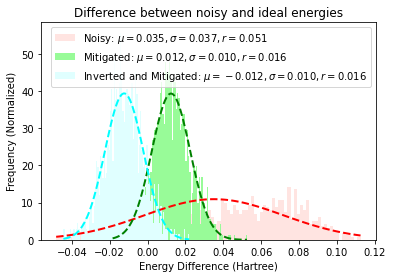

In [11]:
from Plot_Data import stats, plotter
colors = ['mistyrose', 'red', 'palegreen', 'green', 'lightcyan', 'cyan']
plotter(diff_r,diff_nr,diff_inr, colors , 'Regular_Readout.png')

# Without Readout